In [42]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [44]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [45]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [46]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [47]:
# Create a DataFrame with the scaled data
df_scaled_market_data = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns,
    index=df_market_data.index 
)

# Copy the crypto names from the original DataFrame


# Set the coin_id column as index - index=df_market_data.index 


# Display the scaled DataFrame


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [48]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [49]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_scaled_market_data)
    inertia_values.append(kmeans.inertia_)


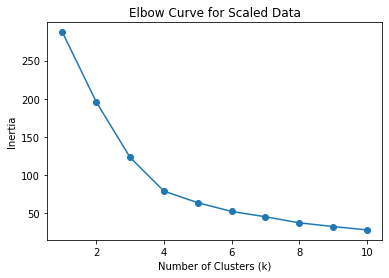

In [50]:
# Create a dictionary with the data to plot the Elbow curve
import matplotlib.pyplot as plt

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Scaled Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Create a DataFrame with the data to plot the Elbow curve


In [51]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4, since that’s where the elbow clearly bends before the inertia starts to level off.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [52]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [53]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_scaled_market_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [54]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions = model.predict(df_scaled_market_data)

# Print the resulting array of cluster values.
print(predictions)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [55]:
# Create a copy of the scaled DataFrame
df_clusters = df_scaled_market_data.copy()

In [56]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clusters["cluster"] = predictions

# Display the copy of the scaled DataFrame
df_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [57]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"]
)

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [58]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [59]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_pca = pca.fit_transform(df_scaled_market_data)

# View the scaled PCA data


In [60]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Explained Variance:", explained_variance.sum())


Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 89.5%.

In [61]:
# Create a new DataFrame with the PCA data.
df_pca_market_data = pd.DataFrame(
    market_pca,
    columns=["PC1", "PC2", "PC3"],
    index=df_scaled_market_data.index
)

# Copy the crypto names from the original scaled DataFrame


# Set the coin_id column as index


# Display the scaled PCA DataFrame
df_pca_market_data.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [62]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 11))

In [63]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=1)
    kmeans_pca.fit(df_pca_market_data)
    inertia_values_pca.append(kmeans_pca.inertia_)

In [64]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve

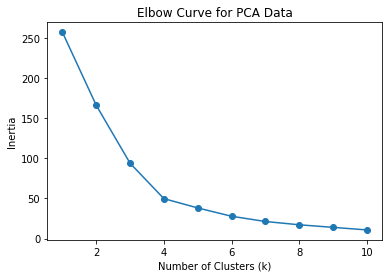

In [65]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(k_values_pca, inertia_values_pca, marker='o')
plt.title('Elbow Curve for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data is 4, since that’s where the elbow bends before leveling off.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ. The best k is 4 for both the original scaled data and the PCA data.



### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [66]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state=1)


In [67]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_pca_market_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [68]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_predictions = model_pca.predict(df_pca_market_data)

# Print the resulting array of cluster values.

In [69]:
# Create a copy of the scaled PCA DataFrame

# Add a new column to the copy of the PCA DataFrame with the predicted clusters

df_pca_clusters = df_pca_market_data.copy()
df_pca_clusters["cluster"] = pca_predictions
# Display the copy of the scaled PCA DataFrame
df_pca_clusters.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [70]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"]
)

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

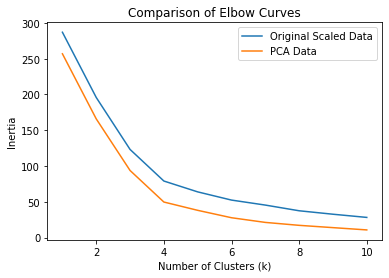

In [71]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
import matplotlib.pyplot as plt

plt.plot(k_values, inertia_values, label="Original Scaled Data")
plt.plot(k_values_pca, inertia_values_pca, label="PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Comparison of Elbow Curves")
plt.legend()
plt.show()

In [72]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
plot1 = df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Original Scaled Data Clusters"
)

plot2 = df_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="PCA Data Clusters"
)

plot1 + plot2

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features (PCA data) makes the clusters tighter and a bit easier to separate visually. However, it also means we lose some of the details from the original data. So, while the clusters look cleaner with PCA, they might not capture all the real-world differences between the cryptocurrencies. It’s basically a trade-off between simplicity and detail.